# Анализ данных о популярности книг
## Источник данных
Набор данных - https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks разработан Soumik с помощью Goodreads API  
  

# Краткое описание набора данных

### Столбцы
* `title`: Название книги.
* `author`: Автор книги.
* `average_rating`: Средний рейтинг книги.
* `language_code`: Код языка книги.
* `num_pages`: Количество страниц в книге.
* `ratings_count`: Количество оценок книги.
* `text_reviews_count`: Количество текстовых отзывов на книгу.
* `publication_date`: Дата публикации книги.
* `publisher`: Издатель книги.
* `genres`: Жанр книги.
* `views_count`: Количество просмотров книги.

### Таблица **books_dataset** - Таблица данных о книгах
* Данные о книгах с различными характеристиками. Доступные столбцы:
  * "title", "author", "average_rating", "language_code", "num_pages", "ratings_count", "text_reviews_count", "publication_date", "publisher", "genres", "views_count"

### Примеры строк данных
* **Пример 1:**
  * Название: "Harry Potter and the Half-Blood Prince (Harry Potter #6)"
  * Автор: J.K. Rowling/Mary GrandPré
  * Средний рейтинг: 4.57
  * Код языка: eng
  * Количество страниц: 652
  * Количество оценок: 2095690
  * Количество текстовых отзывов: 27591
  * Дата публикации: 2006-09-16
  * Издатель: Scholastic Inc.
  * Жанр: Fantasy
  * Количество просмотров: 2163959

* **Пример 2:**
  * Название: "The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy #1-5)"
  * Автор: Douglas Adams
  * Средний рейтинг: 4.38
  * Код языка: eng
  * Количество страниц: 815
  * Количество оценок: 249558
  * Количество текстовых отзывов: 4080
  * Дата публикации: 2002-04-30
  * Издатель: Del Rey Books
  * Жанр: Science
  * Количество просмотров: 335852

### Описание полей
* `title`: Название книги, включает серию и номер в серии.
* `author`: Полное имя автора, иногда включает иллюстратора.
* `average_rating`: Средний пользовательский рейтинг на основе оценок.
* `language_code`: Код языка, на котором написана книга.
* `num_pages`: Общее количество страниц в книге.
* `ratings_count`: Общее количество оценок, оставленных пользователями.
* `text_reviews_count`: Общее количество текстовых отзывов.
* `publication_date`: Дата первой публикации книги.
* `publisher`: Издательство, опубликовавшее книгу.
* `genres`: Жанр, к которому относится книга.
* `views_count`: Общее количество просмотров страницы книги.


# Реализация визуализации данных

In [1]:
# Импортируем нужные нам библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
# Загружаем данные
df = pd.read_csv("C:\\Users\\Omen\\Desktop\\Итоговый проект\\books_dataset.csv")

In [3]:
print(df.columns)

Index(['title', 'author', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'genres', 'views_count'],
      dtype='object')


## Выборка 1: Постройте гистограмму распределения рейтингов книг.

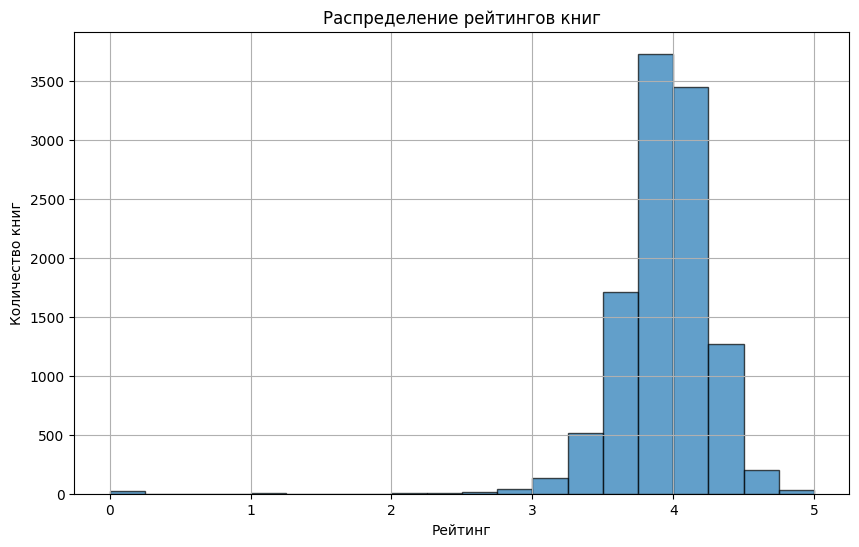

In [4]:
# Построение гистограммы
plt.figure(figsize=(10, 6))  # Установка размера фигуры
plt.hist(df['average_rating'], bins=20, edgecolor='black', alpha=0.7)  
# bins указывает количество столбцов в гистограмме
# edgecolor задает цвет края столбцов
# alpha устанавливает прозрачность столбцов

plt.title('Распределение рейтингов книг')  # Установка заголовка графика
plt.xlabel('Рейтинг')  # Установка метки оси X
plt.ylabel('Количество книг')  # Установка метки оси Y
plt.grid(True)  # Включение сетки на графике для лучшей читаемости
plt.show()  # Отображение графика

* Большинство книг имеют рейтинг 4(+-0.5).

## Выборка 2: С помощью диаграммы столбцов сравните количество книг по жанрам.

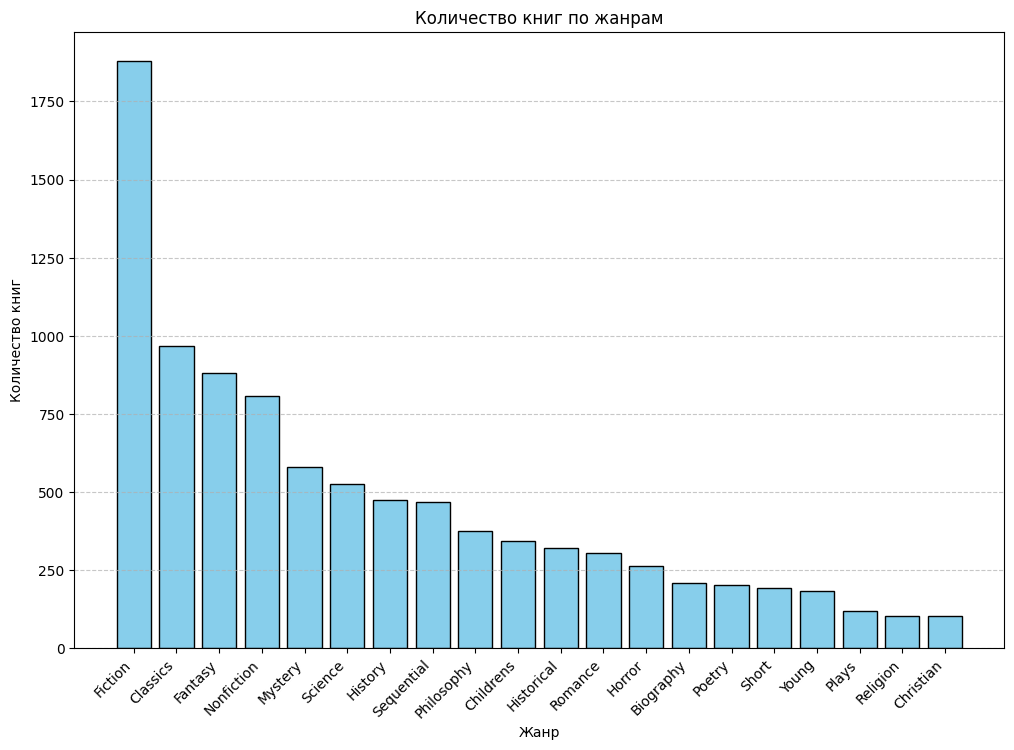

In [5]:
# Подсчет количества книг по жанрам
genre_counts = df['genres'].value_counts()

# Ограничение количества отображаемых жанров (жанров очень много, из-за чего метки по оси x слипаютс)
top_genres = genre_counts.head(20)  # Отображение только 20 самых популярных жанров

# Построение диаграммы столбцов
plt.figure(figsize=(12, 8))  # Увеличение размера фигуры
plt.bar(top_genres.index, top_genres.values, color='skyblue', edgecolor='black')

plt.title('Количество книг по жанрам')  # Установка заголовка графика
plt.xlabel('Жанр')  # Установка метки оси X
plt.ylabel('Количество книг')  # Установка метки оси Y
plt.xticks(rotation=45, ha='right', fontsize=10)  # Поворот меток на 45 градусов, уменьшение шрифта
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Добавление горизонтальной сетки для лучшей читаемости

plt.show()  # Отображение графика

Распределение количества книг по жанрам, показывает, что самым часто используемым жанром является жанр - "Fiction".

 ## Выборка 3: Создайте scatter plot зависимости рейтинга книги от количества оценок.

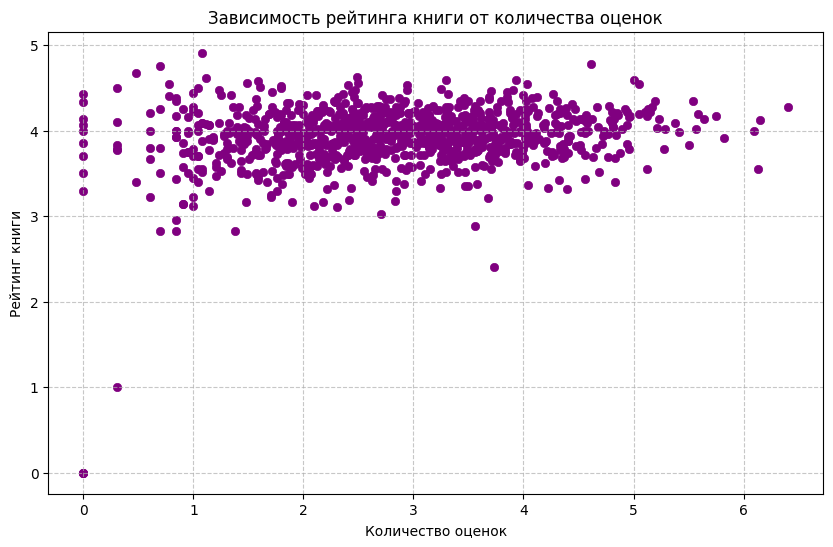

In [6]:
df_sampled = df.sample(n=1000, random_state=47) # Возьмем 1000 случайных элементов
ratings = df_sampled['average_rating']
num_reviews = df_sampled['ratings_count']

# Построение scatter plot
plt.figure(figsize=(10, 6))  # Установка размера фигуры

# Логарифмическое масштабирование количества оценок (т.к их значени слишком большие)
log_num_reviews = np.log10(num_reviews + 1)

plt.scatter(log_num_reviews, ratings,linewidths = 0.5, color='purple')  # Построение точек scatter plot

plt.title('Зависимость рейтинга книги от количества оценок')  # Установка заголовка графика
plt.xlabel('Количество оценок')  # Установка метки оси X
plt.ylabel('Рейтинг книги')  # Установка метки оси Y
plt.grid(True, linestyle='--', alpha=0.7)  # Добавление сетки для лучшей читаемости

plt.show()  # Отображение графика

## Выборка 4: Постройте line chart зависимости среднего рейтинга книг от времени.

я это понял как зависимость среднего рейтинга книг от года публикации

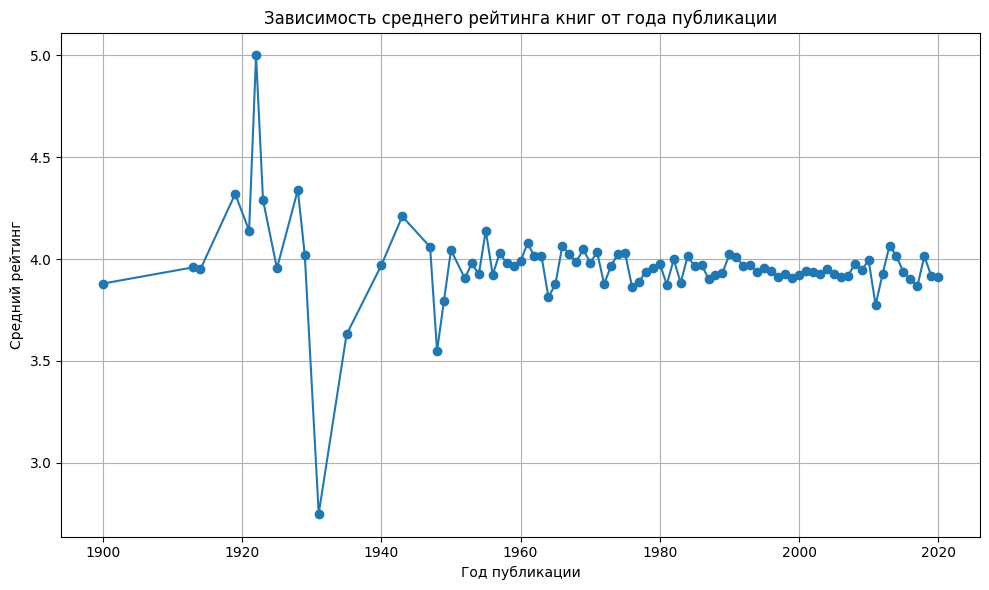

In [7]:
# Извлечение года из столбца publication_date
df['year_published'] = pd.to_datetime(df['publication_date']).dt.year

# Группировка данных по году выпуска и расчет среднего рейтинга
mean_ratings_by_year = df.groupby('year_published')['average_rating'].mean()
# print(mean_ratings_by_year)

# Построение line chart
plt.figure(figsize=(10, 6))
plt.plot(mean_ratings_by_year.index, mean_ratings_by_year.values, marker='o', linestyle='-')
# Атрибут marker='o' добавляет маркеры (точки) к каждой точке данных на графике
# Атрибут linestyle='-' устанавливает сплошную линию между точками данных

plt.xlabel('Год публикации')  # Установка метки оси x
plt.ylabel('Средний рейтинг')  # Установка метки оси y
plt.title('Зависимость среднего рейтинга книг от года публикации')  # Установка заголовка графика
plt.grid(True)  # Добавление сетки для лучшей читаемости
plt.tight_layout()  # Автоматическая подгонка графика для предотвращения наложения элементов
plt.show()  # Отображение графика

По графику можно заметить, что между 1920 и 1930 году был рост среднего рейтинга. Однако вскорое мы можем наблюдать резкий упадок среднего рейтинга в 1930-1940 годах.

## Выборка 5: С помощью box plot сравните распределение рейтингов книг, написанных разными авторами.

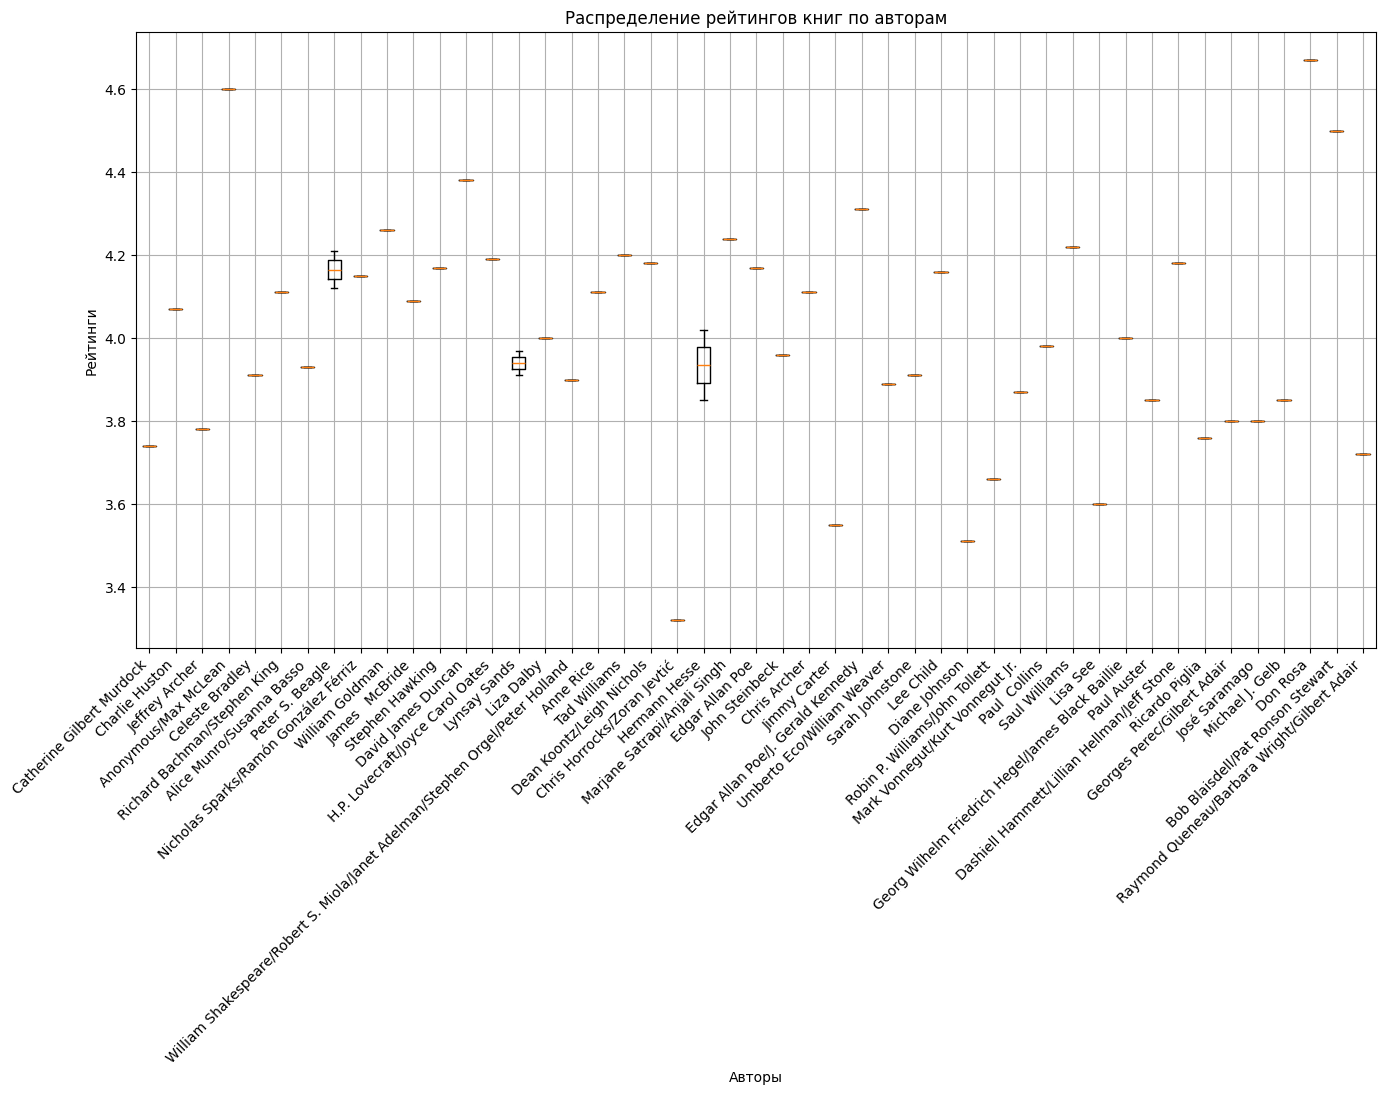

In [8]:
df_sampled = df.sample(n=50, random_state=116) # Возьмем 50 случайных элементов 
# Группировка данных по авторам
authors = df_sampled['author'].unique()
ratings = [df_sampled[df_sampled['author'] == author]['average_rating'] for author in authors]

# Построение box plot
plt.figure(figsize=(16, 8))
plt.boxplot(ratings, tick_labels = authors)

plt.title('Распределение рейтингов книг по авторам') # Установка заголовка графика
plt.xlabel('Авторы') # Установка метки оси x
plt.xticks(rotation=45, ha='right', fontsize=10)  # Поворот меток на 45 градусов, уменьшение шрифта
plt.grid(True)  # Добавление сетки для лучшей читаемости
plt.ylabel('Рейтинги') # Установка метки оси y

plt.show() # Отображение графкика

## Выборка 6: Создайте тепловую карту (heatmap) зависимости рейтинга книги от жанра и количества страниц.

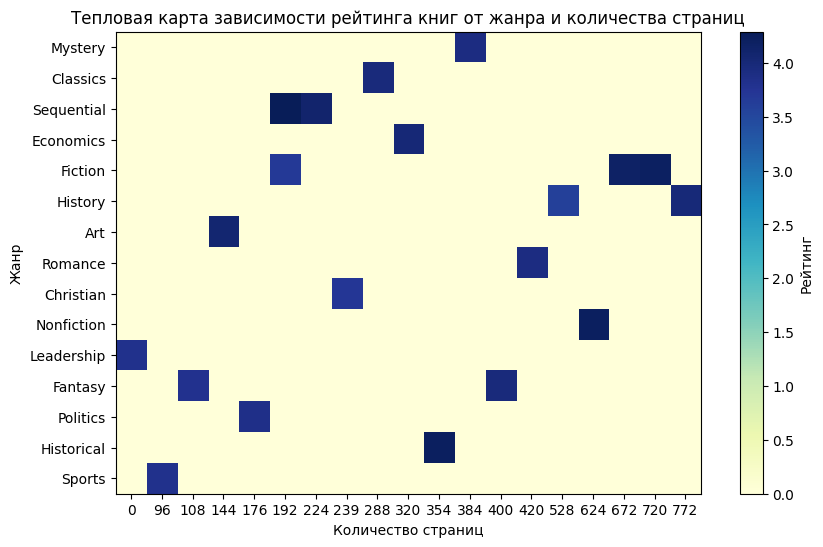

In [9]:
# Выбор случайного подмножества данных (т.к. данных слишком много и получается плохая визуализация)
df_sampled = df.sample(n=20, random_state=42)  # Выберем 20 случайных записей для примера

# Уникальные значения жанров и количества страниц
genres = df_sampled['genres'].unique()
page_counts = sorted(df_sampled['num_pages'].unique())

# Создание матрицы рейтингов
ratings_matrix = np.zeros((len(genres), len(page_counts))) # Матрица состоящая из 0, размера len(genres)xlen(page_counts)

# Заполняем матрицу рейтинга дл тепловой карты
for i, genre in enumerate(genres):
    rating = []
    for j, pages in enumerate(page_counts):
         # Если у книги такой же жанр и количество страниц, то в матрицу мы записываем его рейтинг
        rating = df_sampled[(df_sampled['genres'] == genre) & (df_sampled['num_pages'] == pages)]['average_rating']
        if len(rating) > 0: # Проверка на нахождение хот бы 1
            ratings_matrix[i, j] = rating.values[0] 
# Построение тепловой карты
plt.figure(figsize=(10, 6))
plt.imshow(ratings_matrix, cmap='YlGnBu', interpolation='nearest')

# Настройка осей и меток
plt.xticks(np.arange(len(page_counts)), page_counts) # Метки по оси x
plt.yticks(np.arange(len(genres)), genres) # Метки по оси y
# np.arange() - возвращает одномерный массив чисел с равномерным шагом 
plt.xlabel('Количество страниц')
plt.ylabel('Жанр')
plt.title('Тепловая карта зависимости рейтинга книг от жанра и количества страниц')

# Добавление цветовой шкалы
plt.colorbar(label='Рейтинг')

plt.show() # Отображение тепловой карты

## Выборка 7: Постройте bar chart, сравнивающий количество книг, выпущенных в каждом десятилетии.

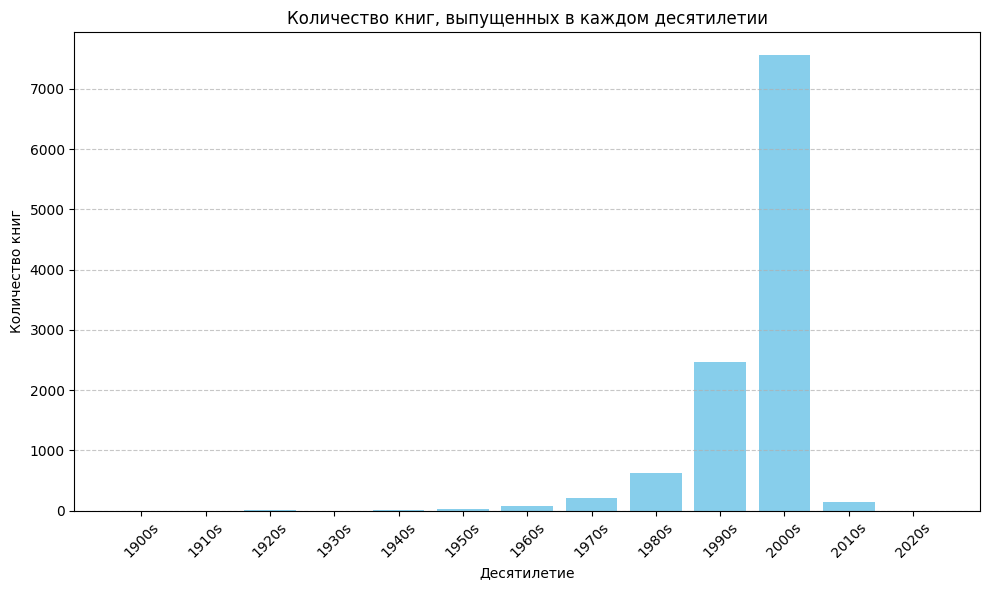

In [10]:
# Функция для определения десятилетия
def decade(year):
    return str(year // 10 * 10) + 's'

# Добавляем столбец с десятилетиями
df['decade'] = df['year_published'].apply(decade)

# Считаем количество книг в каждом десятилетии
decade_counts = df['decade'].value_counts().sort_index()
# print(decade_counts)

# Построение bar chart
plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values, color='skyblue')

# Настройки графика
plt.title('Количество книг, выпущенных в каждом десятилетии')  # Заголовок графика
plt.xlabel('Десятилетие')  # Название оси X
plt.ylabel('Количество книг')  # Название оси Y
plt.xticks(rotation=45)  # Поворот подписей по оси X на 45 градусов для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Отображение пунктирной сетки по оси Y
plt.tight_layout()  # Автоматическое выравнивание элементов графика
plt.show() # Отображение графика

На графике отчетливо видно, что наибольшее количество книг было опубликованно в 2000-ом десятилетии.

## Выборка 8: С помощью scatter plot визуализируйте зависимость рейтинга книги от количества просмотров.

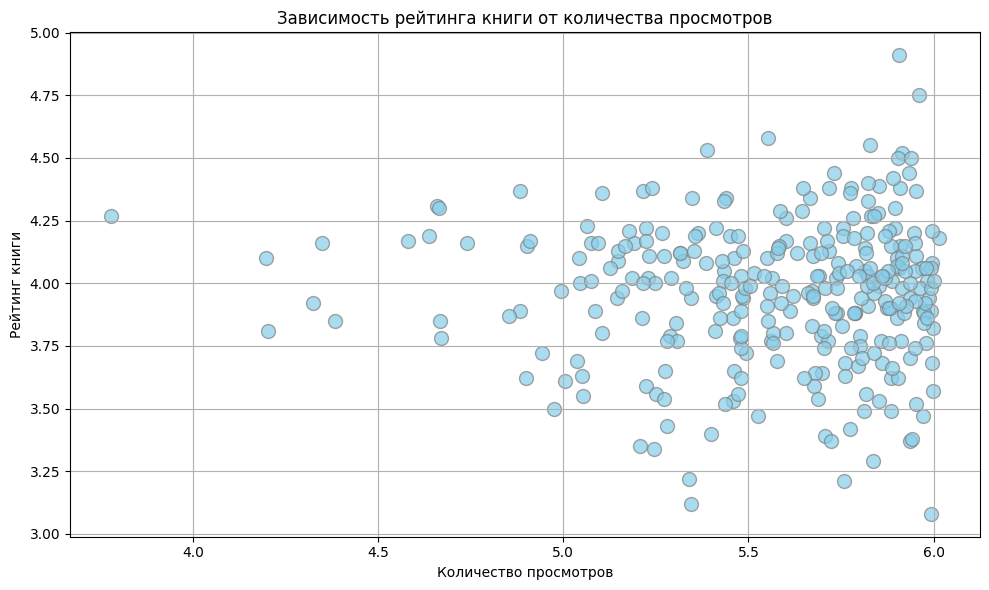

In [11]:
df_sampled = df.sample(n=300, random_state=619) # Возьмем 300 случайных элементов
ratings = df_sampled['average_rating']
num_views = df_sampled['views_count']

# Создание scatter plot
plt.figure(figsize=(10, 6))

# Логарифмическое масштабирование количества просмотров (т.к их значени слишком большие)
log_num_reviews = np.log10(num_views + 1)

plt.scatter(log_num_reviews, ratings, color='skyblue', alpha=0.7, edgecolors='grey', s=100)

# Настройки графика
plt.title('Зависимость рейтинга книги от количества просмотров') # Заголовок графика
plt.xlabel('Количество просмотров') # Название оси X
plt.ylabel('Рейтинг книги') # Название оси Y
plt.grid(True) # Отображение сетки
plt.tight_layout() # Обеспечиваем плотное расположение элементов на фигуре

# Отображение графика
plt.show()

## Выборка 9: Создайте word cloud, отображающую самых популярных авторов книг.

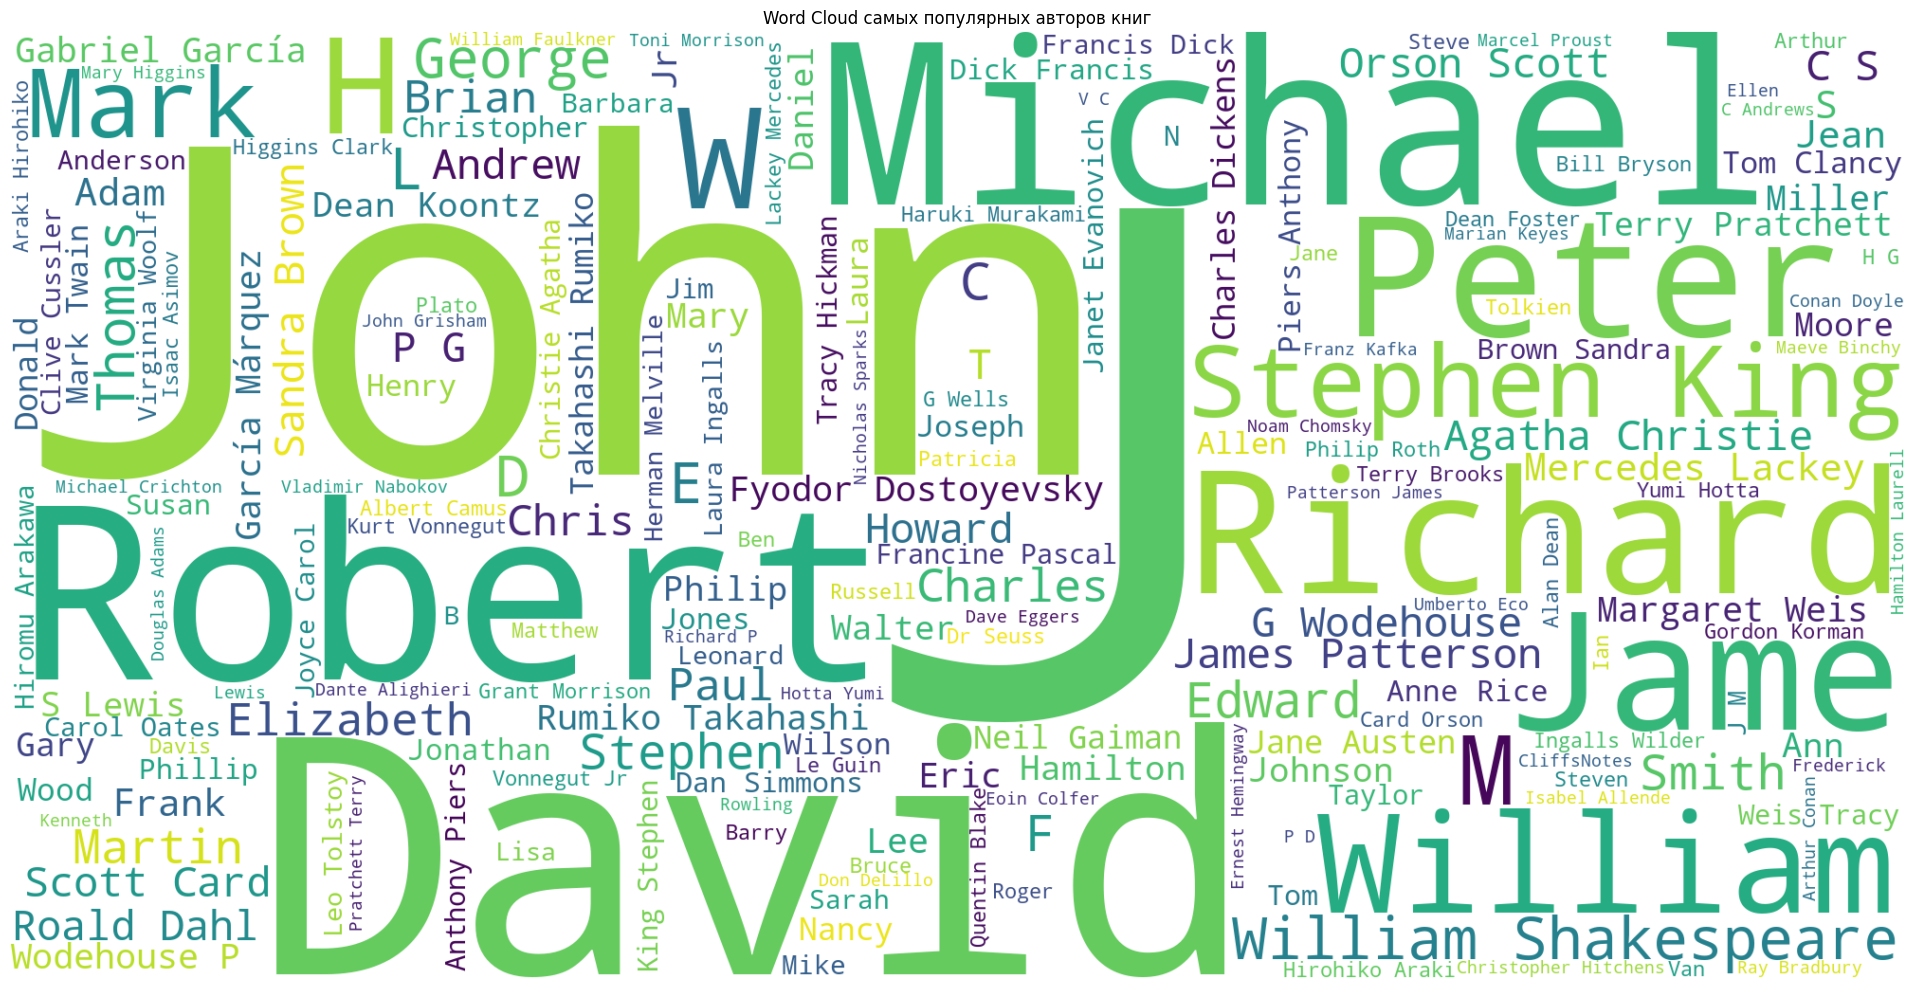

In [12]:
#!pip install Wordcloud

# Создание объекта WordCloud
# Задаем параметры: ширина, высота и цвет фона
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(' '.join(df['author']))

# Отображение word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
# Показываем word cloud с билинейной интерполяцией
# интерполяция 'bilinear' означает, что при масштабировании изображения используется билинейная интерполяция, что делает изображение более гладким

plt.title('Word Cloud самых популярных авторов книг')
plt.axis('off')  # Отключение осей координат
plt.tight_layout() # Обеспечиваем плотное расположение элементов на фигуре
plt.show() # Показываем гарфик

## Выборка 10: Постройте гистограмму распределения количества оценок книг.

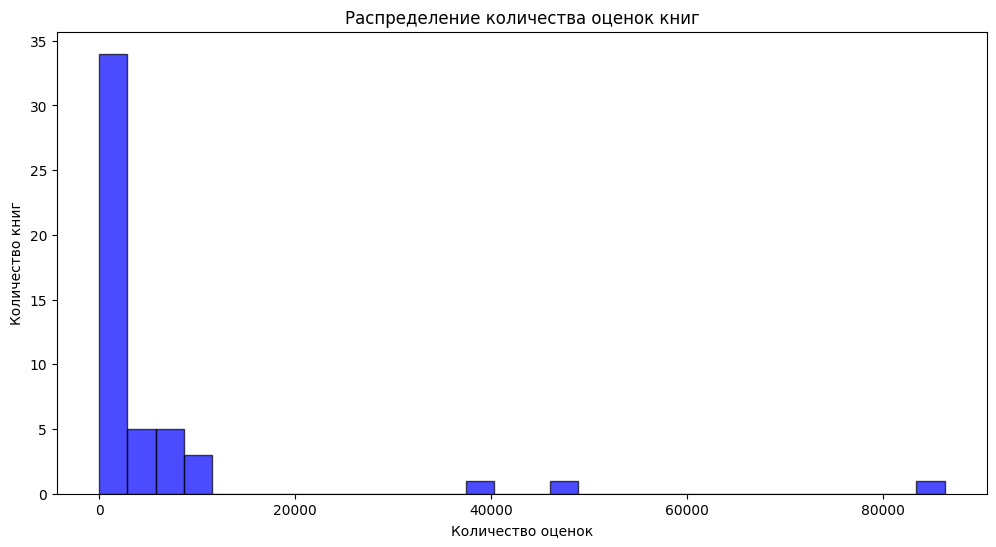

In [13]:
df_sampled = df.sample(n=50, random_state=10) # Возьмем 50 случайных элементов

# Создаем гистограмму
plt.figure(figsize=(12, 6))  # Устанавливаем размер фигуры

plt.hist(df_sampled['ratings_count'], bins=30, color='blue', edgecolor='black', alpha=0.7)
# bins указывает на количество корзин (столбцов) для гистограммы
# color устанавливает цвет столбцов
# edgecolor устанавливает цвет границ столбцов
# alpha делает столбцы слегка прозрачными

# Настройка заголовков и меток
plt.title('Распределение количества оценок книг')  # Устанавливаем заголовок гистограммы
plt.xlabel('Количество оценок')  # Подпись оси X
plt.ylabel('Количество книг')  # Подпись оси Y

plt.show()# Отображаем гистограмму